In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset= pd.read_csv("creditcard.csv")

In [3]:
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,89630.0,0.030601,0.859108,0.290804,-0.591915,0.441892,-1.033405,1.016281,-0.190080,-0.066897,...,-0.251454,-0.537176,0.081516,-0.016869,-0.498699,0.142886,0.250215,0.097351,5.99,0
1,33404.0,1.042874,0.348936,-0.207597,2.215841,0.991928,1.349503,0.100767,0.451493,-0.739607,...,0.064860,0.193583,-0.007651,-1.379281,0.389286,0.225199,0.015614,-0.010651,15.16,0
2,57910.0,-1.549217,0.444995,1.953795,0.767481,1.249854,-0.439201,0.843048,0.145210,-1.561334,...,0.226098,0.136749,-0.178771,-0.013354,0.782533,-0.175391,-0.075909,0.058072,73.02,0
3,133413.0,-0.322340,0.969558,0.462259,-0.100560,-0.187871,-1.069206,0.454631,0.211302,-0.162835,...,0.164689,0.497732,-0.038204,0.420742,-0.191605,-0.333414,-0.032846,-0.010004,9.94,0
4,171524.0,1.990957,-1.984952,-1.014321,-1.265569,-1.371786,0.034195,-1.117904,0.061933,-0.828024,...,-0.416109,-0.844353,0.244993,0.716250,-0.264875,-0.387468,-0.015237,-0.036681,137.94,0


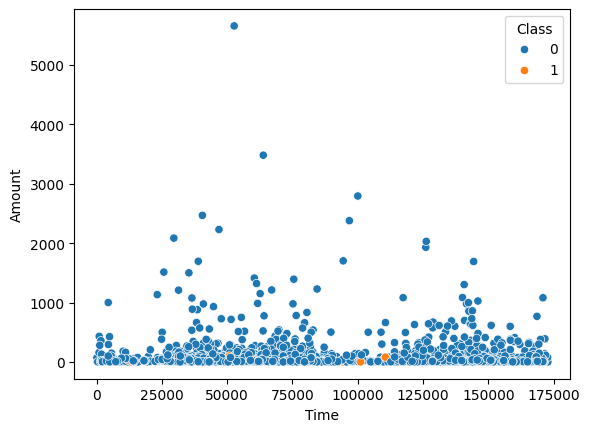

In [4]:
sns.scatterplot(x="Time", y="Amount", data=dataset, hue="Class")
# plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# x = dataset.drop('Class', axis=1) # Features (all columns except Class)
x = dataset.iloc[:,1:3]
y = dataset['Class']  

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.99

In [10]:
   print(x_train.dtypes)  # If using pandas
   

V1    float64
V2    float64
dtype: object


In [11]:
   print(x_train.select_dtypes(include=['object']).columns)  # Shows columns with string data
   

Index([], dtype='str')


In [12]:
   print(x_train.head())
   

           V1        V2
968  1.147733 -0.110466
240  0.976474 -0.170748
819 -1.051205  1.503146
692 -1.047596  0.669724
420 -0.678677 -0.262572


In [13]:
from mlxtend.plotting import plot_decision_regions

C:\Users\pts\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


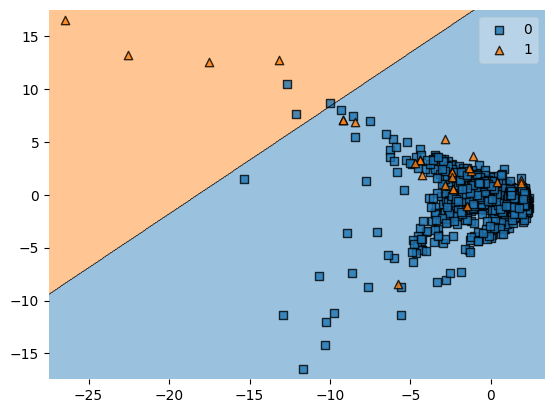

In [14]:
plot_decision_regions(x.to_numpy(),y.to_numpy(), clf=lr)
plt.show()

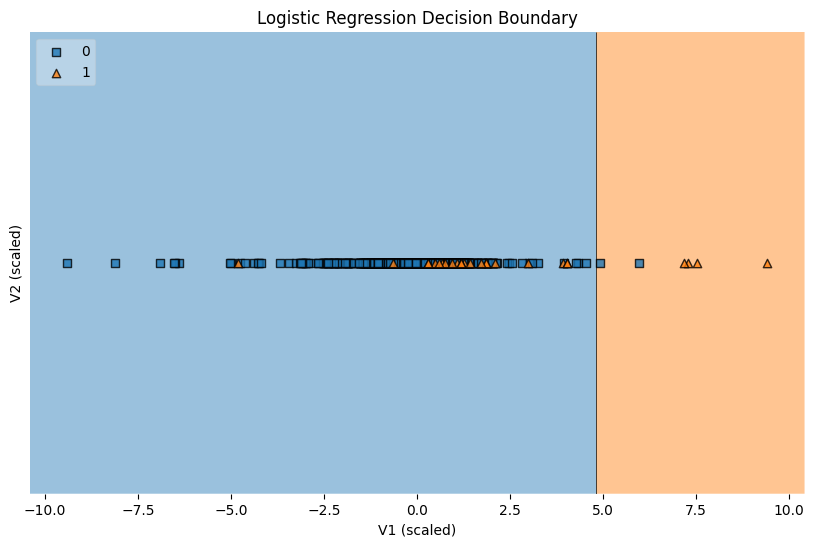

In [15]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Pick only TWO features for the plot
# Let's use V1 and V2 (columns 1 and 2)
X_subset = x.iloc[:, 1:3].to_numpy()
y_subset = y.to_numpy()

# 2. Scale the data (Crucial for Logistic Regression visualization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# 3. Re-fit a small model just for the plot
lr_mini = LogisticRegression()
lr_mini.fit(X_scaled, y_subset)

# 4. Plot
plt.figure(figsize=(10, 6))
plot_decision_regions(X_scaled, y_subset, clf=lr_mini, legend=2)
plt.xlabel('V1 (scaled)')
plt.ylabel('V2 (scaled)')
plt.title('Logistic Regression Decision Boundary')
plt.show()

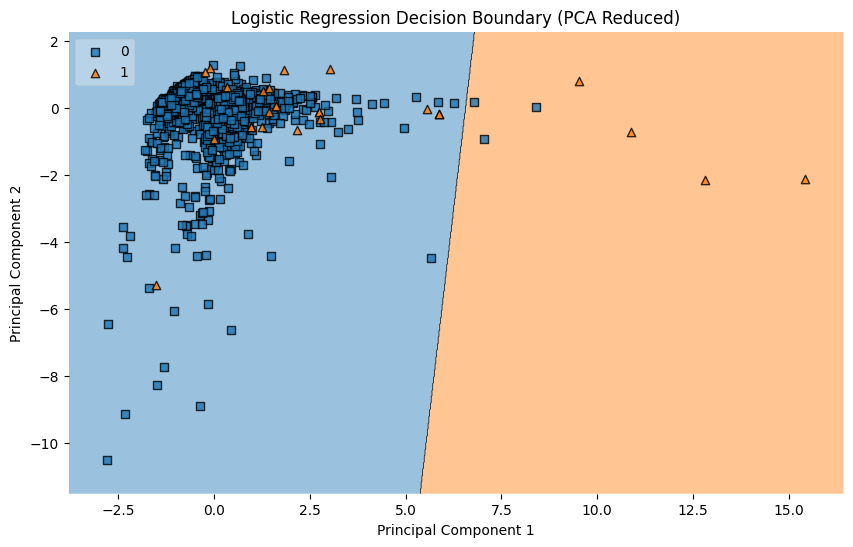

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

# 1. Standardize the features (Required for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# 2. Reduce to 2 Components using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Fit Logistic Regression on the 2 PCA components
lr_pca = LogisticRegression()
lr_pca.fit(X_pca, y)

# 4. Visualize
plt.figure(figsize=(10, 6))
plot_decision_regions(X_pca, y.to_numpy(), clf=lr_pca, legend=2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression Decision Boundary (PCA Reduced)')
plt.show()

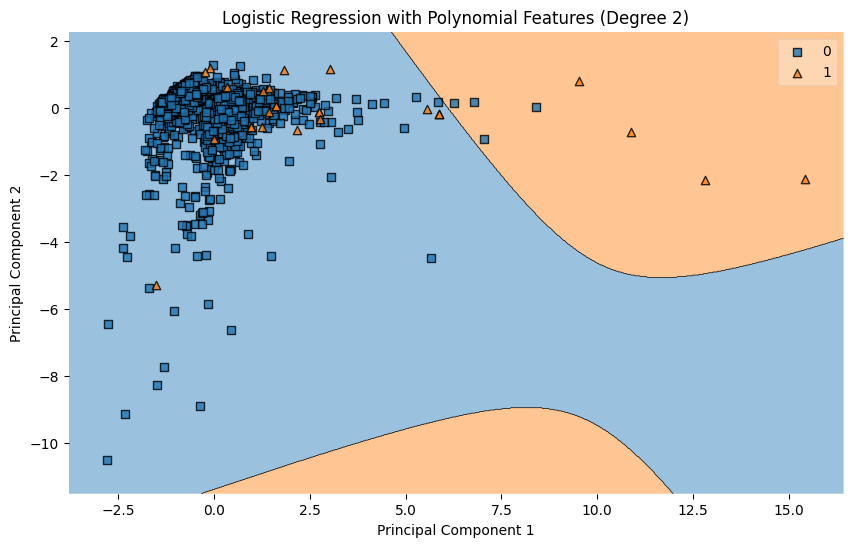

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 1. Reduce data to 2 PCA components (using the X_scaled from before)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. Create a Pipeline: Polynomials -> Logistic Regression
# We use degree=2 to create squares and interactions (e.g., PC1^2, PC1*PC2, PC2^2)
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('logreg', LogisticRegression())
])

# 3. Fit the model
poly_model.fit(X_pca, y)

# 4. Visualize the curved boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_pca, y.to_numpy(), clf=poly_model)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression with Polynomial Features (Degree 2)')
plt.show()

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# 1. Split your PCA data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 2. Fit the Pipeline (from the previous step)
poly_model.fit(X_train, y_train)

# 3. Get the Accuracy Score
accuracy = poly_model.score(X_test, y_test)
print(f"Mean Accuracy: {accuracy:.4f}")

# 4. Get Detailed Metrics
# This is crucial for fraud detection because accuracy can be misleading
y_pred = poly_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Mean Accuracy: 0.9900

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       397
           1       0.00      0.00      0.00         3

    accuracy                           0.99       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.99      0.99      0.99       400



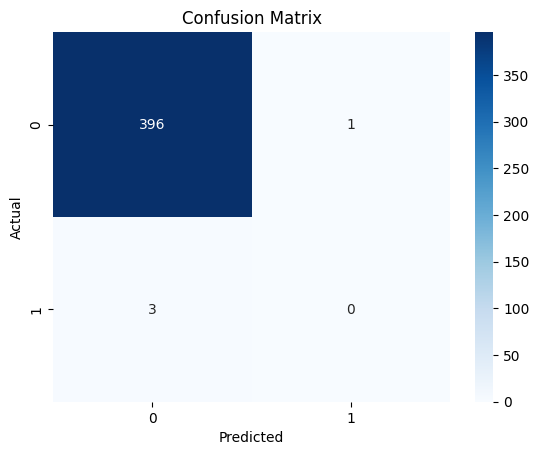

In [19]:

import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# 1. Update the Pipeline with balanced weights
poly_model_balanced = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000))
])

# 2. Fit on the PCA training data
poly_model_balanced.fit(X_train, y_train)

# 3. Evaluate the "Real" performance
y_pred_balanced = poly_model_balanced.predict(X_test)

print("Balanced Model Score:", poly_model_balanced.score(X_test, y_test))
print("\nDetailed Report (Look at the 'Recall' for class 1):")
print(classification_report(y_test, y_pred_balanced))

Balanced Model Score: 0.9025

Detailed Report (Look at the 'Recall' for class 1):
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       397
           1       0.05      0.67      0.09         3

    accuracy                           0.90       400
   macro avg       0.52      0.79      0.52       400
weighted avg       0.99      0.90      0.94       400



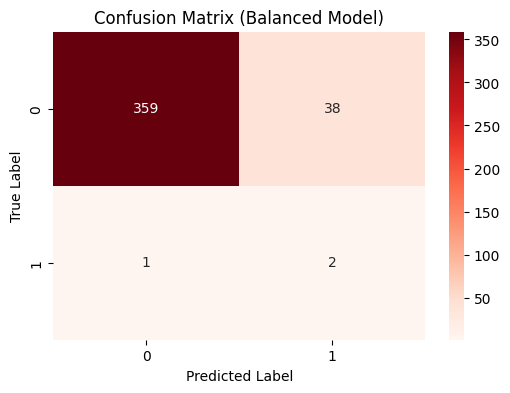

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_balanced)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Balanced Model)')
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV

# 1. Define the Pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000))
])

# 2. Define the degrees you want to test
# Degree 1 = Linear, Degree 2 = Squared, Degree 3 = Cubic
param_grid = {
    'poly__degree': [1, 2, 3]
}

# 3. Run Grid Search
# We use 'f1' scoring to balance catching fraud vs. making mistakes
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# 4. Results
print(f"Best Degree: {grid_search.best_params_['poly__degree']}")
print(f"Best F1 Score: {grid_search.best_score_:.4f}")

Best Degree: 3
Best F1 Score: 0.1783


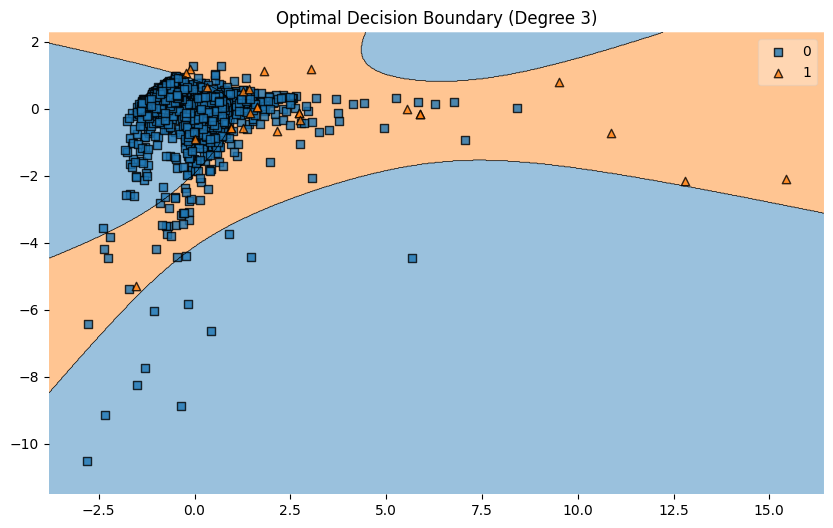

In [23]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X_pca, y.to_numpy(), clf=grid_search.best_estimator_)
plt.title(f"Optimal Decision Boundary (Degree {grid_search.best_params_['poly__degree']})")
plt.show()

In [24]:
import joblib

# 1. Save the "Best Estimator" found by Grid Search
# This contains both the Polynomial transformation and the Logistic Regression
joblib.dump(grid_search.best_estimator_, 'fraud_model_poly.pkl')

# 2. Save the Scaler and PCA
# You need these to transform new raw data into the same format the model expects
joblib.dump(scaler, 'data_scaler.pkl')
joblib.dump(pca, 'pca_processor.pkl')

print("Model and transformers saved successfully!")

Model and transformers saved successfully!


In [30]:
# 1. Define features (x) only
x = dataset.drop('Class', axis=1)

# 2. Fit scaler ONLY on features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x) # Now the scaler only knows about 30 columns

# 3. Now your prediction code will work perfectly:
sample_row = dataset.drop('Class', axis=1).iloc[[0]]
new_data_scaled = scaler.transform(sample_row) # No error!

In [31]:
from sklearn.pipeline import Pipeline

# Create ONE pipeline that does EVERYTHING
master_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('poly', PolynomialFeatures(degree=2)),
    ('logreg', LogisticRegression(class_weight='balanced'))
])

# Now you only need to call .fit() once
master_pipeline.fit(x, y)

# And save only ONE file
joblib.dump(master_pipeline, 'full_fraud_detector.pkl')

['full_fraud_detector.pkl']

Test Accuracy: 0.9750

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       397
           1       0.23      1.00      0.38         3

    accuracy                           0.97       400
   macro avg       0.62      0.99      0.68       400
weighted avg       0.99      0.97      0.98       400



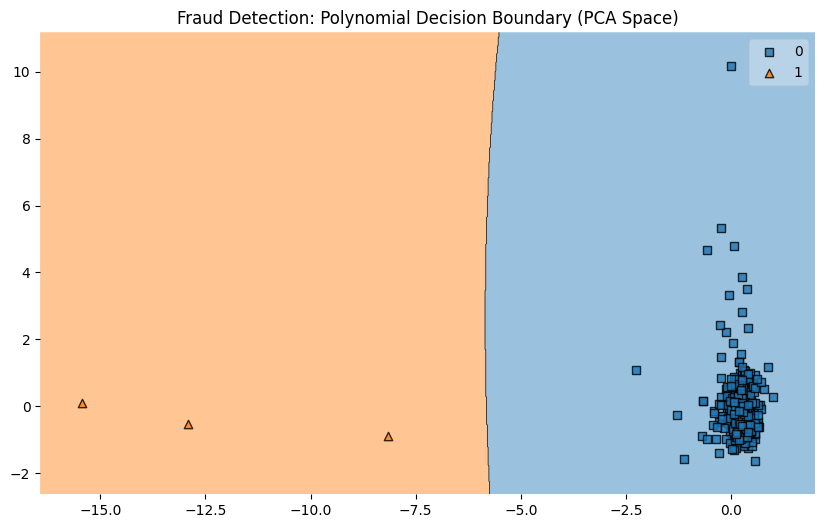

Master model saved as 'fraud_master_model.pkl'


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions

# 1. Load and Prepare Data
dataset = pd.read_csv("creditcard.csv")
X = dataset.drop('Class', axis=1)  # Features only (30 columns)
y = dataset['Class']               # Target only

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Build the Master Pipeline
# This handles Scaling -> PCA -> Polynomials -> Model in one go
master_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('poly', PolynomialFeatures(degree=2)),
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000))
])

# 3. Train the Model
master_pipeline.fit(X_train, y_train)

# 4. Evaluate
print(f"Test Accuracy: {master_pipeline.score(X_test, y_test):.4f}")
y_pred = master_pipeline.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5. Visualize Decision Boundary
# Note: plot_decision_regions needs the 2D PCA data to draw
# So we manually transform the test data for the plot
pca_steps = Pipeline(master_pipeline.steps[:2]) # Only Scaler and PCA
X_test_pca = pca_steps.transform(X_test)

# To plot, we need a "mini-model" that expects 2D PCA inputs
# (since master_pipeline expects 30 raw features)
plot_model = Pipeline(master_pipeline.steps[2:]) # Only Poly and LogReg
plot_model.fit(X_test_pca, y_test)

plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_pca, y_test.to_numpy(), clf=plot_model)
plt.title("Fraud Detection: Polynomial Decision Boundary (PCA Space)")
plt.show()

# 6. Save the entire Master Pipeline
joblib.dump(master_pipeline, 'fraud_master_model.pkl')
print("Master model saved as 'fraud_master_model.pkl'")